## 병합 군집
> 각 포인트를 하나의 클러스터로 지정하고, 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다.

**옵션**
linkage : 가장 비슷한 클러스터를 측정하는 방법 지정
- ward : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침
- average : 포인트 사이의 평균거리가 가장 짧은 클러스터를 합침
- complete : 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침



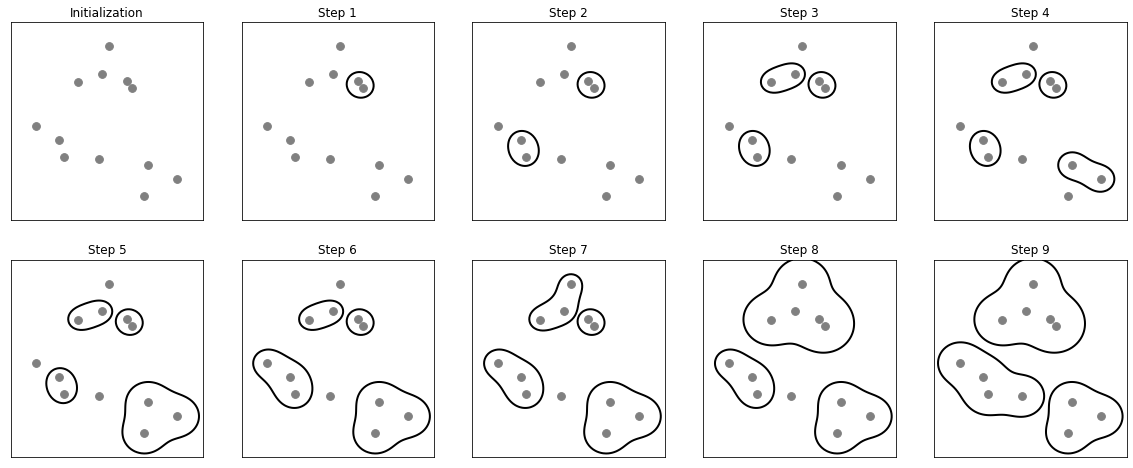

In [1]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

가까운 클러스터끼리 합쳐지는 것을 볼 수 있음

+ 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할수 x (predict 함수 없음)
> 대신 훈련세트로 모델을 만들고, 클러스터 소속 정보를 얻기 위해서 fit_predict를 사용함


Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from c

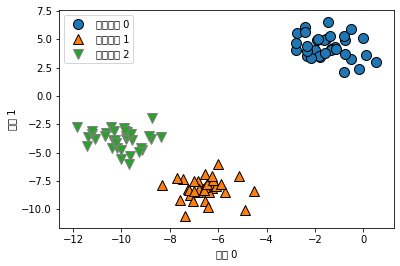

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(random_state = 1)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc = "best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")


### 계층적 군집과 덴드로그램

병합 군집은 **계층적 군집**을 만든다.
+ 군집이 반복하여 진행되면서 중간 단계에 데이터에 대한 각기 다른 개수의 클러스터를 생성함


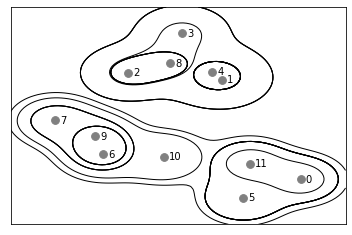

In [3]:
mglearn.plots.plot_agglomerative()

위와 같은 2차원 데이터셋의 계층은 그림으로 나타낼 수 있음, 하지만 다차원 부터는 **덴드로그램**을 이용하여 표시함
+ Scipy 군집 알고리즘은 데이터 배열 X를 받아 계층 군집의 유사도가 들어있는 연결 배열을 반환하는 함수를 제공 
+ 이 연결 배열을 dendogram함수에 넣어 그래프를 그릴 수 있음



Text(0, 0.5, '클러스터 거리')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from c

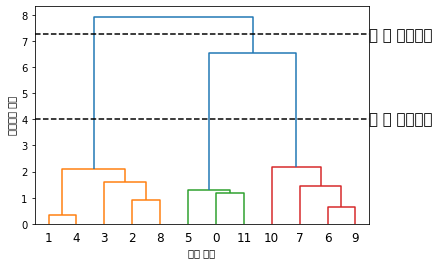

In [4]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state = 0, n_samples = 12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c = 'k')
ax.plot(bounds, [4, 4], '--', c = 'k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va = 'center', fontdict ={'size': 15})
ax.text(bounds[1], 4, '세 개 클러스터', va = 'center', fontdict ={'size': 15})

plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")


가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지 보여줌
+ 병합 군집은 two_moons와 같은 복잡한 형상은 구분 x -> DBSCAN 사용


## DBSCAN
> 클러스터의 개수를 미리 지정하지 않는다.
> 비교적 비어있는 지역을 경계로 한다. 
> 시간은 느리지만, 복잡한 형상, 큰 데이터에서 유용함

+ 밀집 지역(가까이 있는 데이터가 많아 붐비는 지역의 포인트)를 찾는다.
+ eps 거리 안에 있는 핵심 샘플을 탐색하며 min_sample보다 작으면 잡음으로 처리하고, 크면 새로운 클러스터 레이블로 할당한다.



In [5]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state = 0, n_samples = 12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


데이터 셋에 적합하지 않은 min_samples, eps를 주어서 모두 잡음으로 처리해버림

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


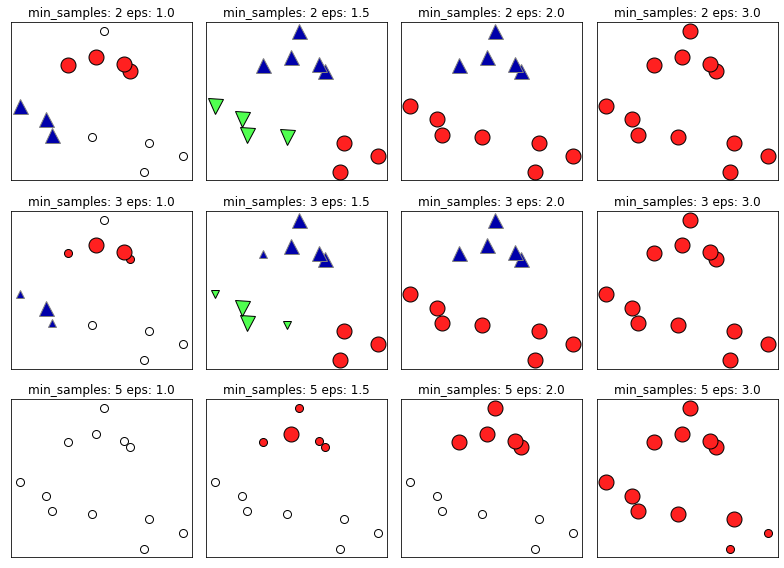

In [6]:
mglearn.plots.plot_dbscan()

적절한 eps를 주려면 StandardScaler나 MinMaxScaler로 모든 특성에 스케일링을 해주어야함


Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


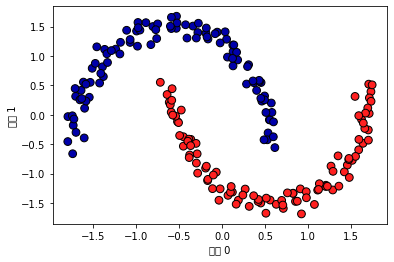

In [11]:

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscam = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:,1], c= clusters, cmap = mglearn.cm2, s = 60, edgecolors = 'black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")


## 군집 알고리즘의 비교와 평가

### 타깃값으로 군집 평가하기

+ ARI, NMI : 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표

**ARI 사용**


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from c

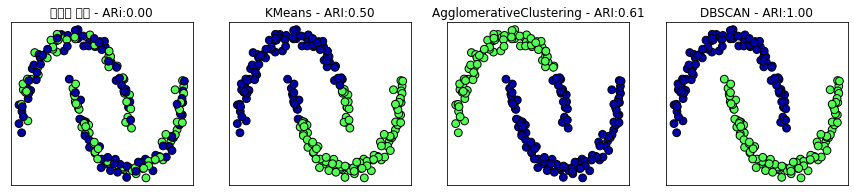

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler= StandardScaler() #스케일 조정
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize = (15,3), subplot_kw={'xticks':(), 'yticks':()})

algorithm = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

#무작위로 클러스터 할당
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high =2, size = len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:, 1], c = random_clusters, cmap = mglearn.cm3, s=60, edgecolors = 'black')
axes[0].set_title("무작위 할당 - ARi:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithm):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:,1], c = clusters, cmap = mglearn.cm3, s = 60, edgecolors = 'black')
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))


In [28]:
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))
# 군집 알고리즘에서는 accuracy_score을 사용하지 않는다. 

정확도: 0.00
ARI: 1.00



### 타깃값 없이 군집 평가하기

실루엣 계수 : 실루엣 점수는 클러스터의 밀집 정도를 계산하는 것으로 높을수록 좋다. 
> 모양이 복잡할 때는 밀집도를 활용한 평가가 잘 들어맞지 않음


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from c

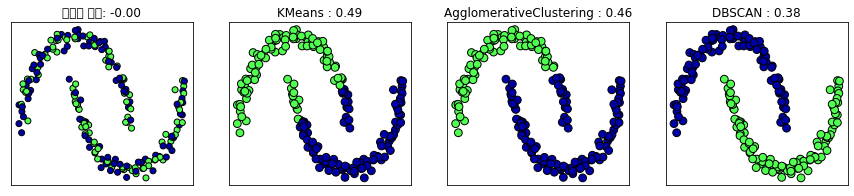

In [32]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize = (15,3), subplot_kw = {'xticks' : (), 'yticks':()})

random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c = random_clusters, cmap = mglearn.cm3, edgecolors = 'black')
axes[0].set_title("무작위 할당: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:,1], c = clusters, cmap = mglearn.cm3, s = 60, edgecolors = 'black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

DBSCAN이 k-군집보다 더 정확도가 낮다고 나옴
> 클러스터 평가에 더 적합한 전략은 견고성 기반의 지표
> 잡음 포인터의 추가 또는 여러 가지 매개변수 설정을 반복하여 결과가 일정하다면 신뢰할 수 있는 정보이다.


### 얼굴 데이터셋으로 군집 알고리즘 비교

LFW 데이터셋으로 알고리즘 적용


In [42]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA #주성분 사용

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255.

pca = PCA(n_components = 100, whiten = True, random_state = 0)
X_pca = pca.fit_transform(X_people)


PCA 없이 원본 데이터를 사용해 클러스터 확인

### DBSCAN


In [43]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [44]:
#매개변수 바꾸기
dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))
#잡음 하나와 클러스터 포인터 하나를 얻음

고유한 레이블: [-1  0]


In [45]:
#잡음 포인터가 몇개인지 출력
print("클러스터별 포인트 수:", np.bincount(labels + 1))

클러스터별 포인트 수: [  32 2031]


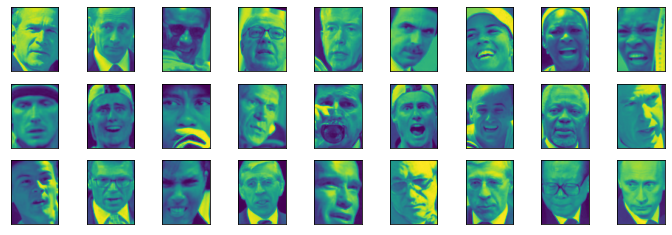

In [46]:
noise = X_people[labels == -1]

fig, axes = plt.subplots(3,9, subplot_kw = {'xticks': (), 'yticks':()}, figsize = (12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin = 0, vmax=1)

이상치 검출 : 특이한 것을 찾아내는 분석

더 많은 클러스터를 찾기 위해 eps를 줄임 


In [47]:
for eps in [1,3,5,7,9,11,13]:
    print("\neps = ",eps)
    dbscan = DBSCAN(eps = eps, min_samples = 3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps =  1
클러스터 수: 1
클러스터 크기: [2063]

eps =  3
클러스터 수: 1
클러스터 크기: [2063]

eps =  5
클러스터 수: 1
클러스터 크기: [2063]

eps =  7
클러스터 수: 14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps =  9
클러스터 수: 4
클러스터 크기: [1307  750    3    3]

eps =  11
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps =  13
클러스터 수: 2
클러스터 크기: [ 120 1943]


모두 잡음이 많고 클러스터가 많지 않음
그 중에서도 eps =7 일때 작지만 여러가지의 클러스터가 생김

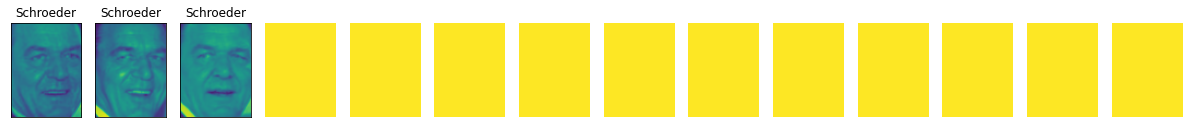

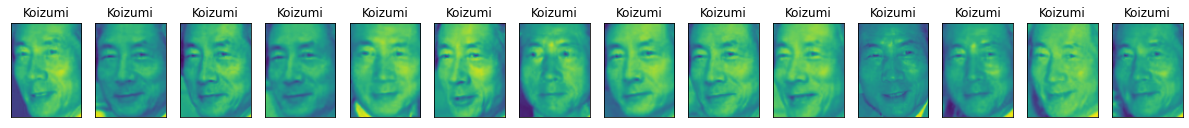

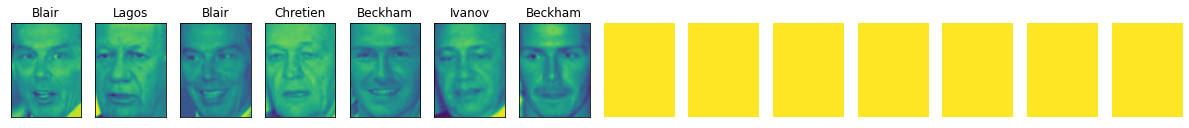

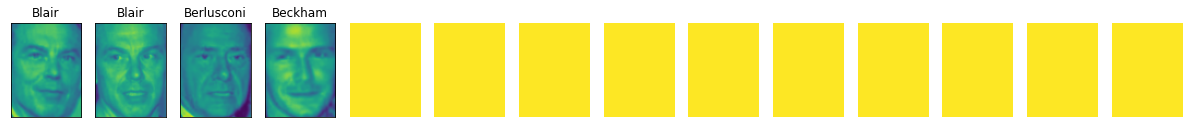

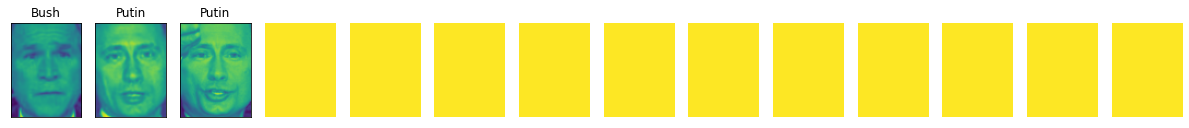

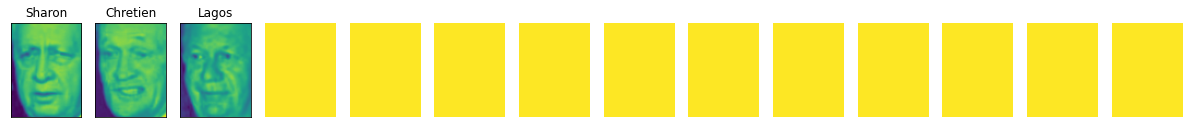

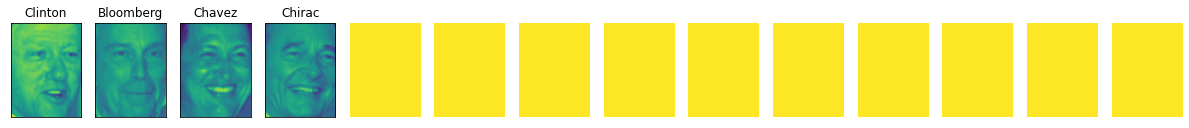

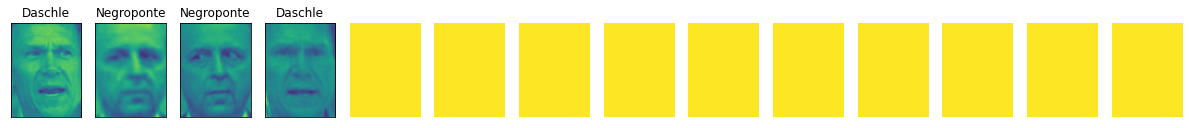

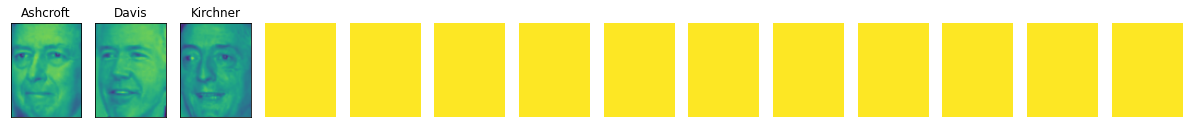

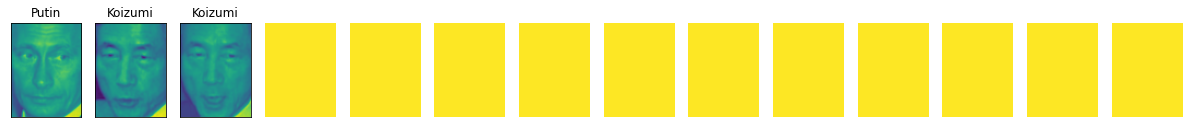

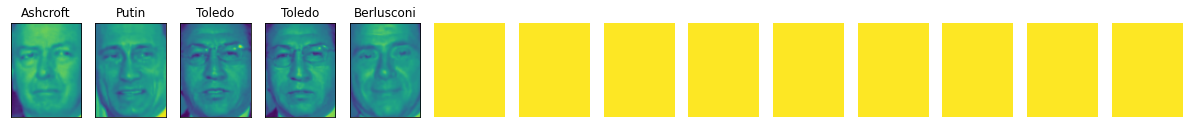

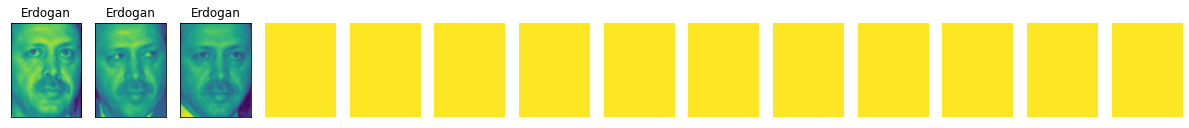

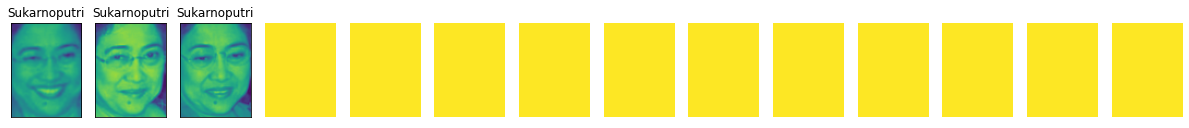

In [49]:
dbscan = DBSCAN(min_samples = 3, eps= 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes= plt.subplots(1,14, figsize = (14*1.5, 4), subplot_kw = {'xticks':(), 'yticks':()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1])
        i +=1 
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin = 0, vmax = 1)
        axes[j+i].axis('off')

뚜렷한 얼굴을 가진 사람들은 분류가 잘 되어있음, 아니면 얼굴의 각도가 비슷하거나 표정이 거의 동일하여 같이 분류되는 경우도 볼 수 있음


### k-평균
> 클러스터를 10정도로 줄여서 적용


In [54]:
km = KMeans(n_clusters=10, random_state = 0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))
# DBSCAN과 달리 클러스터의 데이터 수가 고르게 분포되어있음

k-평균의 클러스터 크기: [282 226 105 268 151 324 202 208 208  89]


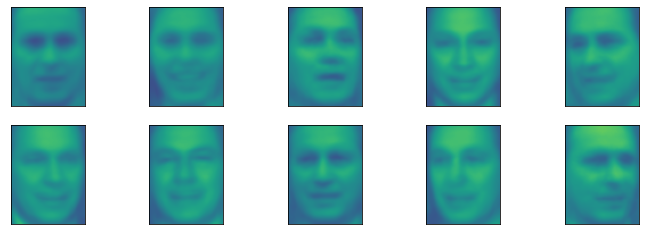

In [56]:
fig, axes = plt.subplots(2,5, subplot_kw ={'xticks':(), 'yticks':()},
                        figsize = (12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin = 0, vmax = 1) 
    #클러스터 10개로 지정했을 때 k-평균이 찾은 클러스터 중심

클러스터에서 가장 대표되는 이미지 다섯개, 동떨어진 이미지 다섯개 출력


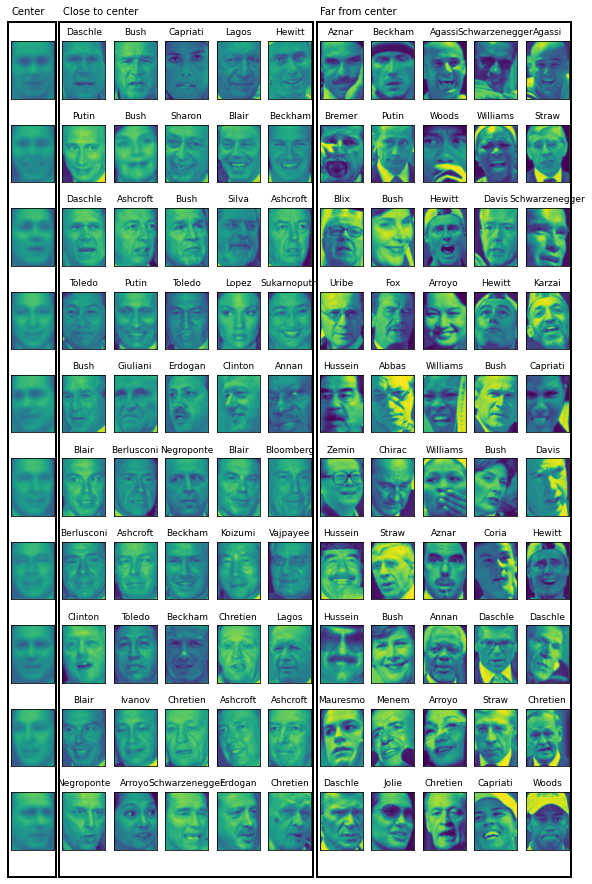

In [57]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

각도, 표정 위주로 클러스터가 분류된 것을 알 수 있다. 
+ 클러스터 수를 늘리면 알고리즘이 미세한 차이를 더 찾을 수 있다. 그러나 클러스터를 많이 추가하면 직접 조사하는 것이 더 어려워진다.


### 병합 군집

In [59]:
agglomerative = AgglomerativeClustering(n_clusters = 10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:",np.bincount(labels_agg)) 
# k-평균만큼은 아니지만 고르게 분포되어있음


병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]
